# Read data (pickle files) / Lire les donnees (fichiers pickle)

## 1. Import needed function / Import des fonctions necessaires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon

## 2. Get the data / Recuperation des donnees

In [2]:
# Shanghai Boundaries
shanghaiMinLongitude = 121.10157 ;
shanghaiMaxLongitude = 121.804611 ;
shanghaiMinLatitude = 30.975 ;
shanghaiMaxLatitude = 31.514999 ;

In [5]:
path = "pickles/utseus-shanghai-taxi-speed-position.pk" # Path of the pickle file / Chemin du fichier pickle
df = pd.read_pickle(path) # Get the data / recupere les donnees
if (type(df) == list) :
    df = pd.DataFrame(data = df, columns = df[0]) 
    df = df.drop(df.index[0])
df.head() # Print first pieces of data / Affiche les premiere donnees

,taxi_id,time,status,lon,lat,speed,geometry
0,24029,2015-04-11,0,121.421822,31.212080,19.6,POINT (121.42653 31.21023)
1,24029,2015-04-11,0,121.423275,31.212148,15.8,POINT (121.42798 31.21029)
2,24029,2015-04-11,0,121.424295,31.212597,11.5,POINT (121.42900 31.21074)
3,24029,2015-04-11,0,121.426872,31.215222,6.5,POINT (121.43157 31.21337)
4,24029,2015-04-11,0,121.427138,31.215365,6.7,POINT (121.43184 31.21351)


## 3. Clear Data

### 3.1 Basic clear / Nettoyage basique 

In [72]:
"""
def tryToDrop(dfName, function, criticalDropSizePercentage) :
    dfSize = exec(dfName + ".size")
    droppedDf = exec(dfName + function)
    if(droppedDf.empty) :
        droppedSize = 0
    else :
        droppedSize = droppedDf.size
    droppedSizePercentage = 100 * (dfSize - droppedDfSize) / dfSize
    if (droppedSizePercentage < criticalDropSizePercentage) :
        exec(dfName + "= droppedDf")
    else :
        answer = '0'
        while (answer not in {'y','n'}) :
            print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(dfSize - droppedSize) +") values.")
            answer = input("Are you sure ? [Y/N]").lower()
        if (answer == 'y') :
            exec(dfName + "= droppedDf")
"""

In [6]:
# Variables / Variables
criticalDropSizePercentage = 2 # Minimal removed size triggering a warning
initialSize = len(df)
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df.dropna() 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")

0.0% (0) values removed.


## 3.1.0 Remove empty string

In [12]:
# Variables / Variables
initialSize = len(df)
column = "latitude" # Column name / Nom de la colonne
    # Delete every row where value is a void string / Enleve toutes les lignes ou la valeur est une chaine de caracteres vide
tempDf = df[df[column] != ""] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")

tempDf = 0

0.0% (0) values removed.


### 3.2 Equal to ... / Egal à ...

In [148]:
# Variables / Variables
column = "noise" # Column name / Nom de la colonne
initialSize = len(df)
value = 0 # Compared value / Valeur comparee
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[df[column] != value] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
        
tempDf = 0

Trying to drop 48% (746479) values.


Are you sure ? [Y/N] y


48.851835054811794% (746479) values removed.


### 3.3 Different than ... / Different de ...

In [ ]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
initialSize = len(df)
value = 0 # Compared value / Valeur comparee
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[df[column] == value] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
        
tempDf = 0

### 3.4 Between ... and ... / Entre ... et ...

In [ ]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
minValue = 0 # Lower border / Borne inferieure
maxValue = 0 # Higher border / Borne superieure
initialSize = len(df) 
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[(df[column] < minValue) | (df[column] > maxValue)] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
        
tempDf = 0

### 3.5 Not between ... and ... / A l'exterieur de ... et ...

In [8]:
# Variables / Variables
column = "lat" # Column name / Nom de la colonne
minValue = shanghaiMinLatitude # Lower border / Borne inferieure
maxValue = shanghaiMaxLatitude # Higher border / Borne superieure
initialSize = len(df) 
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[(df[column].astype(float) >= minValue) & (df[column].astype(float) <= maxValue)] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
        
tempDf = 0

0.9262713959113571% (13828) values removed.


### 3.6 Greater than ... / Superieur a ...

In [123]:
# Variables / Variables
column = "distance" # Column name / Nom de la colonne
initialSize = len(df)
value = 8000 # Compared value / Valeur comparee
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[df[column] <= value] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        print(str(droppedSizePercentage) + "% (" + str(droppedSize) + ") values removed.")
        
tempDf = 0

### 3.7 Lower than ... / Inferieur a ...

In [ ]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
initialSize = len(df)
value = 0 # Compared value / Valeur comparee
# Funtions / Fonctions
    # Delete every row that contains NaN (Not a Number) / Enleve toutes les lignes contenant NaN (Not a Number)
tempDf = df[df[column] <= value] 
droppedSize = initialSize - len(tempDf)
droppedSizePercentage = 100 * droppedSize / initialSize
if (droppedSizePercentage < criticalDropSizePercentage) :
    df = tempDf
    initialSize = len(df)
else : 
    answer = '0'
    while (answer not in {'y','n'}) :
        print("Trying to drop " + str(int(droppedSizePercentage)) + "% (" + str(droppedSize) +") values.")
        answer = input("Are you sure ? [Y/N]").lower()
    if (answer == 'y') :
        df = tempDf 
        initialSize = len(df)

## 4. Test on data / Test sur les donnees

### 4.1 Basic statistics / Statistiques basiques

In [36]:
# Variables / Variables
column = "distance" # Column Name / Nom de la colonne
# Functions / Fonctions
print(df.describe())


              clean smell noise   town district longitude latitude
count     458   458   458   458    458      458       458      458
unique    413     4     3     2    130       17       440      440
top     新桥居委会     3   0.0   0.0  徐家汇街道     浦东新区                   
freq       10   227   375   365     10       83         6        6


### 4.2 Equal to ... / Egal a ...

In [48]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
value = 0 # Compared value / Valeur comparee
# Functions / Fonctions
selectedSize = len(df[df[column] == value]) # Selection size / Taille de la selection
totalSize = len(df) # Total size / Taille totale
print("Amount of values / Nombre de valeurs = " + str(selectedSize) + " / " + str(totalSize) + " (~ " + str(int(100 * selectedSize/totalSize)) + "%)")
df[df[column] == value].head() # Print results / Affichage les resultats

Amount of values / Nombre de valeurs = 3894858 / 6651720 (~ 58%)


,name,branch_name,address,telephone,city,latitude,longitude,avg_rating,product_grade,decoration_grade,service_grade,product_score,decoration_score,service_score,review_count,avg_price,photo_count,category
business_id,,,,,,,,,,,,,,,,,,
503952,ID_API_PROBLEM,None,None,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1092,23.0,NaN,NaN
506697,紫阳花俱乐部(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,静安区华山路728号,021-62107945,上海,31.215690,121.43956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,1.0,酒吧
506926,QQ食尚快餐(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区老沪闵路715号,021-64241354,上海,31.142511,121.42903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.0,1.0,快餐简餐
561512,万丰大酒店(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,浦东新区上南路3719号,021-68527177,上海,31.152372,121.50378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,71.0,16.0,本帮菜
563844,ID_API_PROBLEM,None,None,None,None,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2192,0.0,NaN,NaN


### 4.3 Different than ... / Different de ...

In [5]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
value = 0 # Compared value / Valeur comparee
# Functions / Fonctions
selectedSize = len(df[df[column] != value]) # Selection size / Taille de la selection
totalSize = len(df) # Total size / Taille totale
print("Amount of values / Nombre de valeurs = " + str(selectedSize) + " / " + str(totalSize) + " (~ " + str(int(100 * selectedSize/totalSize)) + "%)")
df[df[column] != value].head() # Print results / Affichage les resultats

,name,branch_name,address,telephone,city,latitude,longitude,avg_rating,product_grade,decoration_grade,service_grade,product_score,decoration_score,service_score,review_count,avg_price,photo_count,category
business_id,,,,,,,,,,,,,,,,,,
500019,沃歌斯(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),中信泰富店,静安区南京西路1168号中信泰富B1楼,021-52925228,上海,31.228676,121.455765,40.0,1.0,1.0,1.0,7.9,7.8,7.7,855,70.0,414.0,西式简餐
500057,宝莱纳餐厅(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),新天地店,卢湾区太仓路181弄新天地北里19-20号,021-63203935,上海,31.220670,121.474570,40.0,1.0,1.0,1.0,7.7,8.1,7.3,3621,165.0,2545.0,酒吧
500058,宝莱纳餐厅(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),汾阳店,徐汇区汾阳路150号,021-64745700,上海,31.209503,121.452490,40.0,1.0,1.0,1.0,7.9,8.4,7.8,3245,170.0,2885.0,酒吧
500067,避风塘(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),古北店,长宁区水城南路17号万科广场1楼,021-62086388,上海,31.193920,121.393720,35.0,1.0,1.0,1.0,7.6,7.3,6.6,926,81.0,435.0,茶餐厅
500068,避风塘(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),八佰伴店,浦东新区张杨路501号第一八佰伴9楼,021-58365928,上海,31.228100,121.517460,30.0,1.0,1.0,1.0,7.2,6.8,6.5,4159,78.0,1460.0,茶餐厅


### 4.4 At least ... / Au moins ... 

In [109]:
# Variables / Variables
column = "distance" # Column name / Nom de la colonne
value = 15000 # Compared value / Valeur comparee
# Functions / Fonctions
selectedSize = len(df[df[column] >= value]) # Selection size / Taille de la selection
totalSize = len(df) # Total size / Taille totale
print("Amount of values / Nombre de valeurs = " + str(selectedSize) + " / " + str(totalSize) + " (~ " + str(int(100 * selectedSize/totalSize)) + "%)")
df[df[column] >= value].head() # Print results / Affichage les resultats

Amount of values / Nombre de valeurs = 447 / 255888 (~ 0%)


,quietness,distance,geometry
115,-1.25325,15016.956055,"LINESTRING (120.41422 30.88314, 120.41101 30.8..."
487,-10.00000,15549.641602,"LINESTRING (121.69601 31.63084, 121.68967 31.6..."
488,-10.00000,17066.800781,"LINESTRING (121.82422 31.54598, 121.82825 31.5..."
1600,-10.00000,23631.394531,"LINESTRING (121.69977 31.78324, 121.70283 31.7..."
1904,-10.00000,16257.675781,"LINESTRING (120.99470 30.63359, 120.98418 30.6..."


### 4.5 Smaller than ... / Plus petit que ... 

In [46]:
# Variables / Variables
column = "avg_rating" # Column name / Nom de la colonne
value = 50 # Compared value / Valeur comparee
# Functions / Fonctions
selectedSize = len (df[df[column] < value]) # Selection size / Taille de la selection
totalSize = len(df) # Total size / Taille totale
print("Amount of values / Nombre de valeurs = " + str(selectedSize) + " / " + str(totalSize) + " (~ " + str(int(100 * selectedSize/totalSize)) + "%)")
df[df[column] < value].head() # Print results / Affichage les resultats

Amount of values / Nombre de valeurs = 6624324 / 6651720 (~ 99%)


,name,branch_name,address,telephone,city,latitude,longitude,avg_rating,product_grade,decoration_grade,service_grade,product_score,decoration_score,service_score,review_count,avg_price,photo_count,category
business_id,,,,,,,,,,,,,,,,,,
500000,阿凡提美食娱乐城(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,虹口区曲阳路775号天山宾馆B1楼,021-65559604,上海,31.288305,121.490440,30.0,1.0,1.0,1.0,6.8,6.3,6.3,482,81.0,140.0,新疆菜
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,31.208550,121.449710,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,酒吧
500001,萨莎(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,徐汇区东平路11号,021-64746628,上海,31.208550,121.449710,40.0,1.0,1.0,1.0,7.3,8.4,7.4,891,149.0,441.0,牛排
500003,1221餐馆(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,长宁区延安西路1221号,021-62136585,上海,31.211315,121.427780,35.0,1.0,1.0,1.0,7.1,7.4,7.6,369,144.0,182.0,本帮菜
500008,Food Live(这是一条测试商户数据，仅用于测试开发，开发完成后请申请正式数据...),,浦东新区世纪大道88号金茂君悦大酒店B1楼,021-50491234-8283,上海,31.235252,121.505745,30.0,1.0,1.0,1.0,6.1,6.3,6.3,38,26.0,12.0,快餐简餐


## 5. Plot / Affichage

### 5.1 Barplot / Histogramme

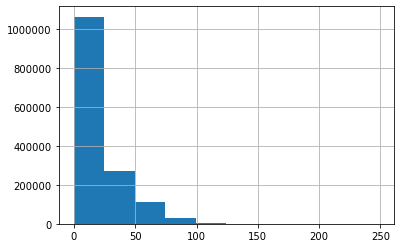

In [9]:
# Variables / Variables
column = "speed" # Column name / Nom de la colonne
# Functions / Fonctions
df[column].hist()

### 5.2 Simple graph / Graphique Simple

In [43]:
# Variables / Variables
column = "noise" # Column name / Nom de la colonne
# Functions / Fonctions
df[[column]].plot()

TypeError: no numeric data to plot

### 5.3 Boxplot / Boite a moustaches

In [62]:
# Variables / Variables
column = "noise" # Column name / Nom de la colonne
# Functions / Fonctions
df[column].boxplot()

TypeError: only size-1 arrays can be converted to Python scalars

NameError: name 'DataFrame' is not defined

In [77]:
df['neighborhood'] = df[""]

In [117]:
savedDf = df[["lon", "lat", "speed"]]

In [118]:
savedDf.index = df.taxi_id

In [119]:
savedDf

,lon,lat,speed
taxi_id,,,
24029,121.421822,31.212080,19.6
24029,121.423275,31.212148,15.8
24029,121.424295,31.212597,11.5
24029,121.426872,31.215222,6.5
24029,121.427138,31.215365,6.7
...,...,...,...
28192,121.433313,31.273960,34.1
28192,121.433088,31.271658,19.4
28192,121.432843,31.271480,0.0


In [152]:
df = df[df.lon != ""]
df = df[df.lat != ""]
df["lon"] = df['lon'].apply(float)
df["lat"] = df['lat'].apply(float)

/usr/lib/python3.8/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [153]:
df.columns

Index(['taxi_id', 'time', 'status', 'lon', 'lat', 'speed', 'geometry'], dtype='object')

In [154]:
savedDf = df[["lon", "lat", "speed"]]
savedDf.to_pickle("pickles/utseus-shanghai-taxi-speed-position-cleaned.pk")

In [17]:
df = df[df.start_location_x != ""]
df = df[df.start_location_y != ""]
df = df[df.end_location_x != ""]
df = df[df.end_location_y != ""]
df["start_location_x"] = df['start_location_x'].apply(float)
df["start_location_y"] = df['start_location_y'].apply(float)
df["end_location_x"] = df['end_location_x'].apply(float)
df["end_location_y"] = df['end_location_y'].apply(float)

In [164]:
df.columns

Index(['', 'clean', 'smell', 'noise', 'town', 'district', 'longitude',
       'latitude'],
      dtype='object')

In [166]:
savedDf = df[["noise", "longitude", "latitude", "district", "town"]]
savedDf.to_pickle("pickles/TARGET-communities-extract-wellbeing-cleaned.pkl")

In [125]:
neighborhood = pd.read_pickle("pickles/utseus-cendus-shanghai-neighborhoods.pk")

In [126]:
neighborhood.head()

,NAME,TYPE,geometry
0,??,2,"POLYGON Z ((121.42168 30.68471 0.00000, 121.42..."
1,???,2,"POLYGON Z ((121.41199 30.69374 0.00000, 121.41..."
2,???,2,"POLYGON Z ((121.40163 30.70717 0.00000, 121.40..."
3,????,2,"POLYGON Z ((121.33687 30.73806 0.00000, 121.33..."
4,????,2,"POLYGON Z ((121.25143 30.79177 0.00000, 121.25..."


In [157]:
len(savedDf)

774794

In [128]:
neighborhood.type.unique

<bound method Series.unique of 0      Polygon
1      Polygon
2      Polygon
3      Polygon
4      Polygon
        ...   
261    Polygon
262    Polygon
263    Polygon
264    Polygon
265    Polygon
Length: 266, dtype: object>

In [139]:
df.columns

Index(['lon', 'lat', 'speed'], dtype='object')

In [5]:
df.head()

,quietness,distance,geometry
0,0.101105,30.081160,"LINESTRING (121.56385 29.82884, 121.56384 29.8..."
1,0.099379,363.090546,"LINESTRING (121.56385 29.82884, 121.56364 29.8..."
2,0.099379,12.700058,"LINESTRING (121.56398 29.82885, 121.56385 29.8..."
3,0.101105,95.892204,"LINESTRING (121.56391 29.82970, 121.56386 29.8..."
4,-10.000000,561.564880,"LINESTRING (121.53612 29.78676, 121.53969 29.7..."


In [7]:
shPoly = Polygon([(shanghaiMinLongitude, shanghaiMinLatitude), (shanghaiMinLongitude, shanghaiMaxLatitude), (shanghaiMaxLongitude, shanghaiMaxLatitude), (shanghaiMaxLongitude, shanghaiMinLatitude)])

In [10]:
size = len(df)
df = df[df.geometry.within(shPoly)]
print(size - len(df), "values dropped")

38874 values dropped


In [11]:
df

,quietness,distance,geometry
12,0.441669,68.359344,"LINESTRING (121.47242 31.22315, 121.47226 31.2..."
13,-0.535838,178.448013,"LINESTRING (121.47226 31.22375, 121.47253 31.2..."
14,-0.015765,60.692032,"LINESTRING (121.47162 31.22376, 121.47176 31.2..."
15,-0.981896,9515.562500,"LINESTRING (121.10299 31.43277, 121.11661 31.4..."
16,-0.140280,97.197342,"LINESTRING (121.16872 31.36934, 121.16868 31.3..."
...,...,...,...
85409,-10.000000,280.298615,"LINESTRING (121.30810 31.25230, 121.31105 31.2..."
85410,-0.078818,36.047173,"LINESTRING (121.37199 31.36137, 121.37165 31.3..."
85413,0.442709,1.591406,"LINESTRING (121.22730 31.33499, 121.22729 31.3..."
85414,-0.028708,31.211342,"LINESTRING (121.21182 31.26743, 121.21198 31.2..."


In [12]:
df.to_pickle("pickles/utseus-quiet-roads-cleaned.pk")

In [23]:
df.columns

Index(['orderid', 'bikeid', 'userid', 'start_time', 'start_location_x',
       'start_location_y', 'end_time', 'end_location_x', 'end_location_y',
       'track'],
      dtype='object')

In [25]:
savedDf = df[['start_location_x', 'start_location_y', 'end_location_x', 'end_location_y',]]
savedDf.head()

,start_location_x,start_location_y,end_location_x,end_location_y
0,121.490,31.280,121.486,31.273
1,121.462,31.313,121.455,31.315
2,121.416,31.154,121.419,31.156
3,121.436,31.320,121.444,31.310
4,121.459,31.325,121.460,31.315


In [26]:
savedDf.to_pickle("pickles/utseus-mobike-2016-cleaned.pk")

In [19]:
df.to_csv("pickles/TARGET-communities-extract-wellbeing-3params-cleaned.csv")

In [17]:
df.head()

,,clean,smell,noise,town,district,longitude,latitude
1,万寿社区居委会,3,0.0,0.0,盈浦街道,青浦区,121.104287016932,31.1558823799679
2,万泰花园第一居委会,3,1.0,0.0,七宝镇,闵行区,121.351529089795,31.144326843509
3,万科阳光苑居委会,2,0.0,0.0,吴泾镇,闵行区,121.468520387505,31.0422853979528
4,万豪居委会,3,0.0,0.0,长征镇,普陀区,121.367237458941,31.2407251034807
5,万里名轩社区居委会,2,,0.0,万里街道,普陀区,121.403601417271,31.269155049366


In [30]:
for i in range(10) :
    clear_output(wait=True)
    print(i)

0


NameError: name 'sleep' is not defined

In [27]:
from IPython.display import clear_output

In [13]:
df.to_pickle("pickles/utseus-shanghai-taxi-speed-position-cleaned-new.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

In [11]:
df = 0